# Plotting 

## Testing custom matplotlib styles

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#generate random data points
yA, yB = np.random.randn(20), 0.5+np.random.randn(20)
xA, xB = np.random.normal(1, 0.1, len(yA)), np.random.normal(3, 0.1, len(yB))

In [3]:
#available plotting styles/themes
print(plt.style.available)

['_classic_test', 'seaborn-pastel', 'dark_background', 'seaborn-bright', 'seaborn-white', 'seaborn-deep', 'seaborn-dark-palette', 'grayscale', 'seaborn-talk', 'seaborn-whitegrid', 'classic', 'fast', 'tonu_dark', 'ggplot', 'seaborn-muted', 'bmh', 'seaborn', 'fivethirtyeight', 'seaborn-poster', 'seaborn-notebook', 'seaborn-ticks', 'seaborn-darkgrid', 'seaborn-colorblind', 'seaborn-dark', 'tableau-colorblind10', 'seaborn-paper', 'Solarize_Light2']


Created my own style "tonu_dark'. A .mplstyle file must be created into /home/tonu_ilves/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib directory. There reside all the other style files aswell.

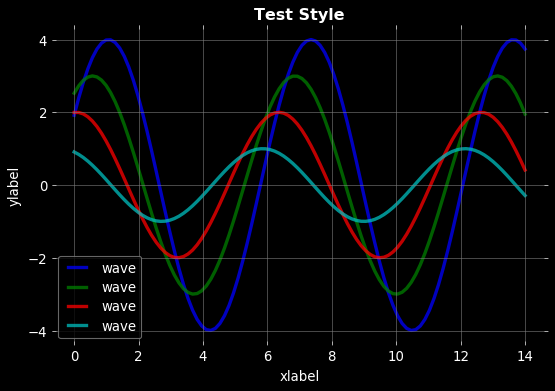

In [4]:
plt.style.use('tonu_dark')
def waves(n_waves, flip=1):
    x=np.linspace(0,14,100)
    cm = plt.cm.get_cmap('Set1')
    for i in range(1,n_waves+1):
        plt.plot(x,np.sin(x+0.5*i) * (n_waves+1-i)*flip, lw=3, alpha=0.75,label='wave')
    plt.margins(0.05)
    plt.title('Tonu Dark Style')
    plt.xlabel("xlabel")
    plt.ylabel('ylabel', )
    plt.legend()
waves(4)

In [5]:
str1 = 'AB'
str2 = '12'
sums = []
for i in str1:
    for j in str2:
        sums.append(i+j)
sums

['A1', 'A2', 'B1', 'B2']

In [7]:
[i+j for j in str1 for i in str2]

['1A', '2A', '1B', '2B']

In [8]:
names = ['Natasha Romanoff', 'Clint barton']
characters1 = ['Thor Odinson', 'Steve Rogers']

for char,name in zip(characters1,names):
    print((char, name))

('Thor Odinson', 'Natasha Romanoff')
('Steve Rogers', 'Clint barton')


In [13]:
s = zip(characters1, names)
type(*s)

TypeError: type() takes 1 or 3 arguments

In [14]:
import pandas as pd

In [17]:
df = pd.DataFrame({'A': [1,2,3],'B': [4,5,6]})


In [25]:
df=init_df()

NameError: name 'init_df' is not defined